(3000, 2)


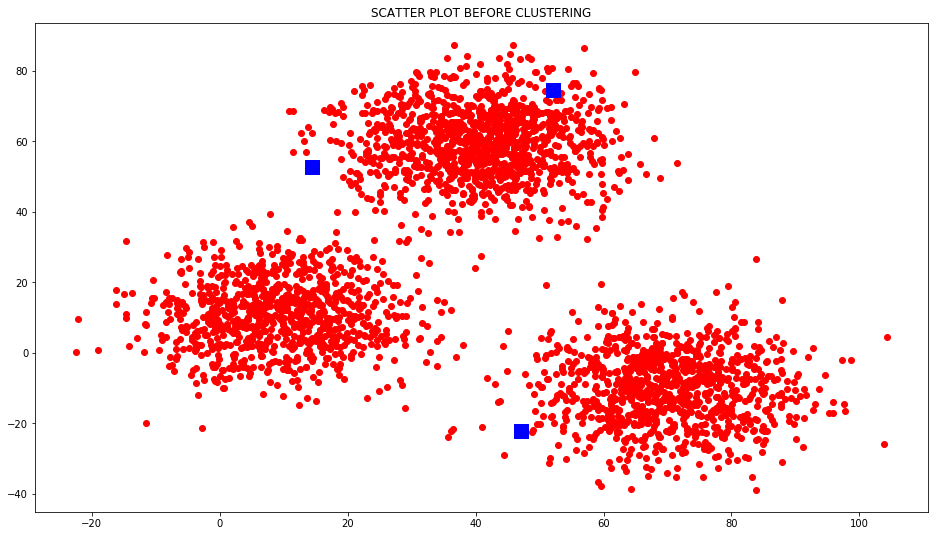

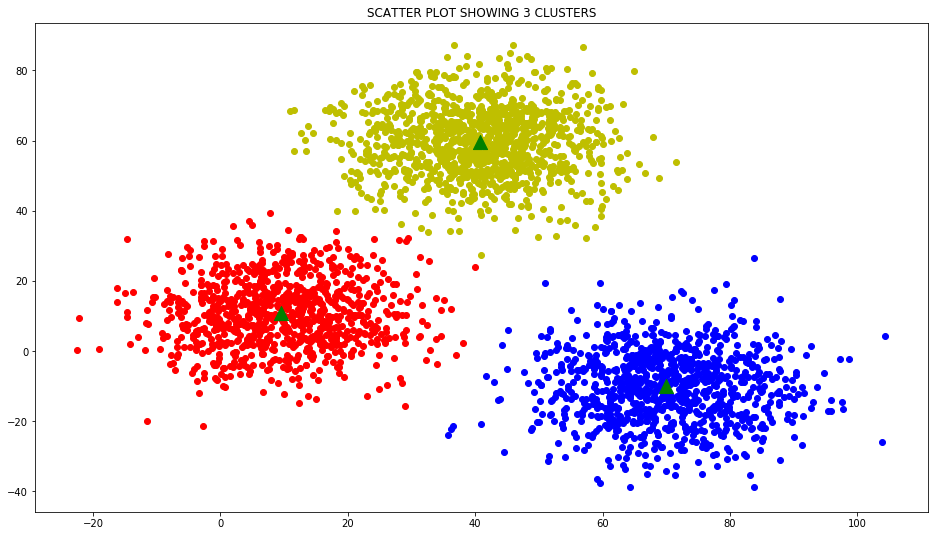

In [1]:
from copy import deepcopy
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pclust={}
clusp={}
clust={}
var=1
plt.rcParams['figure.figsize']=(16,9)
data=pd.read_csv("kmean.csv",index_col=0)
print(data.shape)
f=[]
for it in data.columns:
    f.append(list(data[it]))
X=np.array(list(zip(*f)))

k=0
def sets(t): #done
    global clust
    global k
    global f
    k=t
    for i in range(k):
        clust[i]=[]
        for j in range(0,len(f)):
            clust[i].append(np.random.choice(f[j]))
    if len(f)==2:
        plt.scatter(f[0],f[1],c='r')
        plt.title('SCATTER PLOT BEFORE CLUSTERING')
        plt.rcParams['figure.figsize']=(16,9)
        for i in range(0,k):
            plt.scatter(clust[i][0],clust[i][1],c='b',marker='s',s=200)
        plt.show()
def dist(it):
    global clust
    li=[]
    for i in range(0,k):
        v=0
        for j in range(0,len(it)):
            v+=(clust[i][j]-it[j])**2
        li.append(round(np.power(v,1/len(it)),4))
    return li
def call():   #done
    global clusp
    for i in range(0,k):
        clusp[i]=[]
def comp():
    global var
    global clust
    global pclust
    global clusp
    global f
    call()
    for it in zip(*f):
        li=dist(np.array(it))
        mi=min(li)
        ix=li.index(mi)
        clusp[ix].append(np.array(it))
    clust=[avg(i) for i in range(0,k)]
    if pclust==clust:
        var=0
    pclust=clust
    return var,clusp
def avg(ix):
    global clusp
    means=[]
    clust=[]
    for i in range(0,len(f)):
        s=0
        for it in clusp[ix]:
            s+=it[i]
        means.append(np.round((s/len(clusp[ix])),4))
    return means
def cluster(kk):
    global var
    sets(kk)
    call()
    while var!=0:
        var,clp=comp()
def printcluster():
    global k
    global clust
    global clusp
    c=['y','r','b','c','m','k','w','y','r','m','c']
    kk=[[] for i in range(k)]
    jj=[[] for i in range(k)]
    for i in range(0,k):
        for j in clusp[i]:
            kk[i].append(j[0])
            jj[i].append(j[1])
    for i in range(k):
        plt.scatter(kk[i],jj[i],c=c[i])
        plt.scatter(clust[i][0],clust[i][1],marker='^',c='g',s=200)
    _=plt.title('SCATTER PLOT SHOWING {0} CLUSTERS'.format(k))
    plt.show()
cluster(3)
printcluster()